<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor 
* customer analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
import os 
from datetime import datetime, date, time, timezone, timedelta

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [14]:
raw = skd.load_diabetes()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [15]:
x2 = x.assign(sex = np.where(x.sex >= 0, 1, 0))
x2 = pd.get_dummies(x2, columns = ['sex'])
x2.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex_0,sex_1
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1,0


In [16]:
x_tr_1, x_te_1, y_tr_1, y_te_1 = train_test_split(x, y, train_size = .7)
x_tr_2, x_te_2, y_tr_2, y_te_2 = train_test_split(x2, y, train_size = .7)

In [19]:
rf_fit_1 = RandomForestRegressor().fit(x_tr_1, y_tr_1)
rf_fit_2 = RandomForestRegressor().fit(x_tr_2, y_tr_2)
pred_rf_1 = rf_fit_1.predict(x_te_1)
pred_rf_2 = rf_fit_2.predict(x_te_2)

In [20]:
mean_squared_error(y_te_1, pred_rf_1), mean_squared_error(y_te_2, pred_rf_2)

(3521.439463157895, 3133.2384270676694)

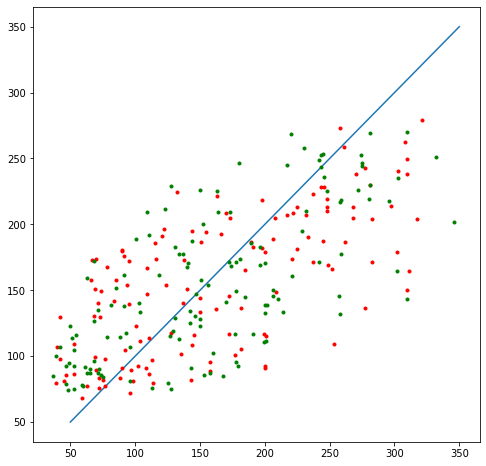

In [22]:
plt.figure(figsize = [8, 8])
plt.plot([50,350], [50,350])
plt.plot(y_te_1, pred_rf_1, '.', color = 'red')
plt.plot(y_te_2, pred_rf_2, '.', color = 'green')

# customer analysis

In [23]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'retail_data_transactions.csv',
 'ecommerce-data.csv',
 'retail_data_response.csv',
 'rfm_test.csv',
 'online_retail_II.xlsx',
 'sample_data']

In [32]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')

In [33]:
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [34]:
df.columns = df.iloc[0,:]

In [35]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [37]:
df = df.drop(0, axis = 0)

In [38]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [39]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [41]:
df = df[df['order_status'] == 'Approved']
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [42]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [46]:
df = df[['customer_id', 'transaction_date', 'list_price']].sort_values(['customer_id', 'transaction_date'], ascending = [1, 1])
df.head()

,customer_id,transaction_date,list_price
9785,1,2017-01-05,360.4
13424,1,2017-02-21,71.49
14486,1,2017-03-27,688.63
18970,1,2017-03-29,1274.93
3765,1,2017-04-06,1577.53


In [47]:
df.columns = ['id', 'date', 'rev']
df.head()

,id,date,rev
9785,1,2017-01-05,360.4
13424,1,2017-02-21,71.49
14486,1,2017-03-27,688.63
18970,1,2017-03-29,1274.93
3765,1,2017-04-06,1577.53


In [51]:
 df['month'] = df['date'].to_numpy().astype('datetime64[M]')
 df.head()

,id,date,rev,month
9785,1,2017-01-05,360.4,2017-01-01
13424,1,2017-02-21,71.49,2017-02-01
14486,1,2017-03-27,688.63,2017-03-01
18970,1,2017-03-29,1274.93,2017-03-01
3765,1,2017-04-06,1577.53,2017-04-01


In [52]:
list_pu = df.groupby(['id', 'month']).first().reset_index()
list_npu = df.groupby(['id']).first().reset_index()

In [54]:
list_month = list_pu['month'].sort_values().unique()

In [80]:
for mon in list_month :
  
  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month']).agg({'rev':'count'}).reset_index()
  temp = temp.assign(npu_month = mon,
              num = temp['month'].rank()).rename(columns = {'rev' : 'pu'}).drop(['month'], axis = 1).reindex(['npu_month', 'num', 'pu'], axis = 1)
  
  if mon == list_month[0] :

    res = temp

  else :

    res = pd.concat([res, temp], axis = 0)

res = res.assign(ratio = res.groupby(['npu_month'])['pu'].apply(lambda x : x/x.max()))
res.head()


,npu_month,num,pu,ratio
0,2017-01-01,1.0,1347,1.000000
1,2017-01-01,2.0,483,0.358575
2,2017-01-01,3.0,505,0.374907
3,2017-01-01,4.0,499,0.370453
4,2017-01-01,5.0,492,0.365256


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


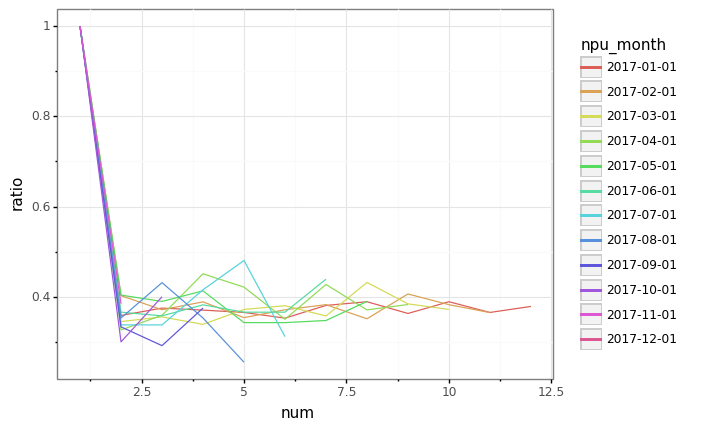

<ggplot: (8736529274481)>

In [81]:
(
    ggplot(res.assign(npu_month = res.npu_month.astype(str)),
           aes('num', 'ratio', color = 'npu_month')
           ) +
    gg.geom_line() +
    gg.theme_bw()
)